# aSPEM Experiment :defining a protocol




In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
timeStr = '2017-09-20_151043'
observer = 'LB'
mode = 'enregistrement'
from  aSPEM import Analysis
e = Analysis(observer=observer, mode=mode, timeStr=timeStr) # FIX@

['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']


In [3]:
t_titre = 35
t_label = 25 
fig_width = 15

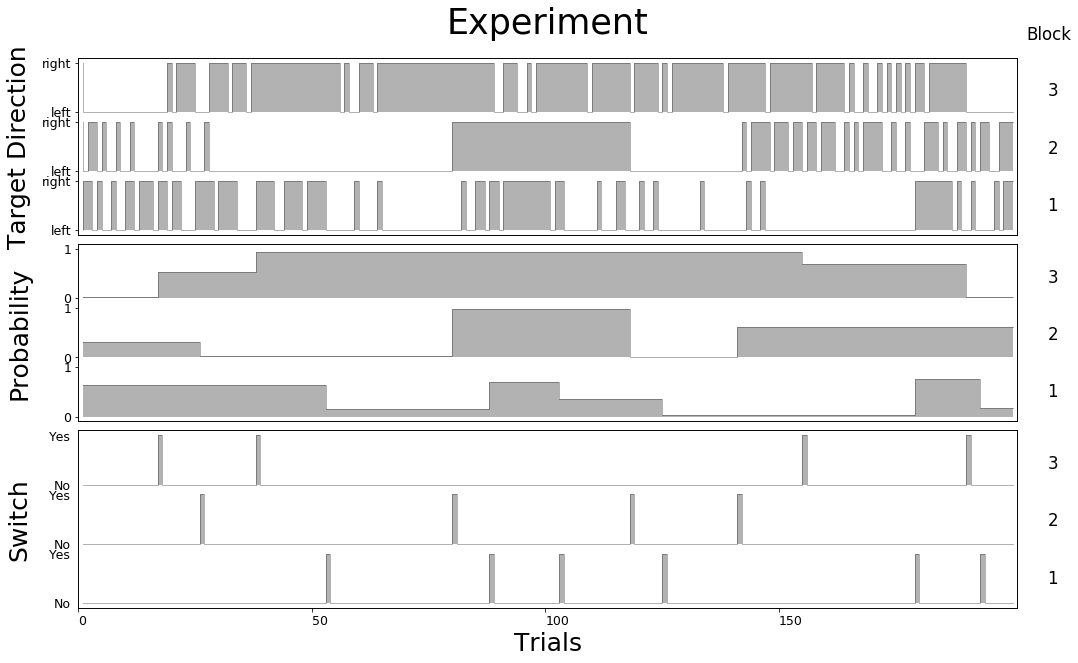

In [4]:
fig, axs, p = e.plot_experiment(fig_width=fig_width, t_titre=t_titre, t_label=t_label, mode=None)

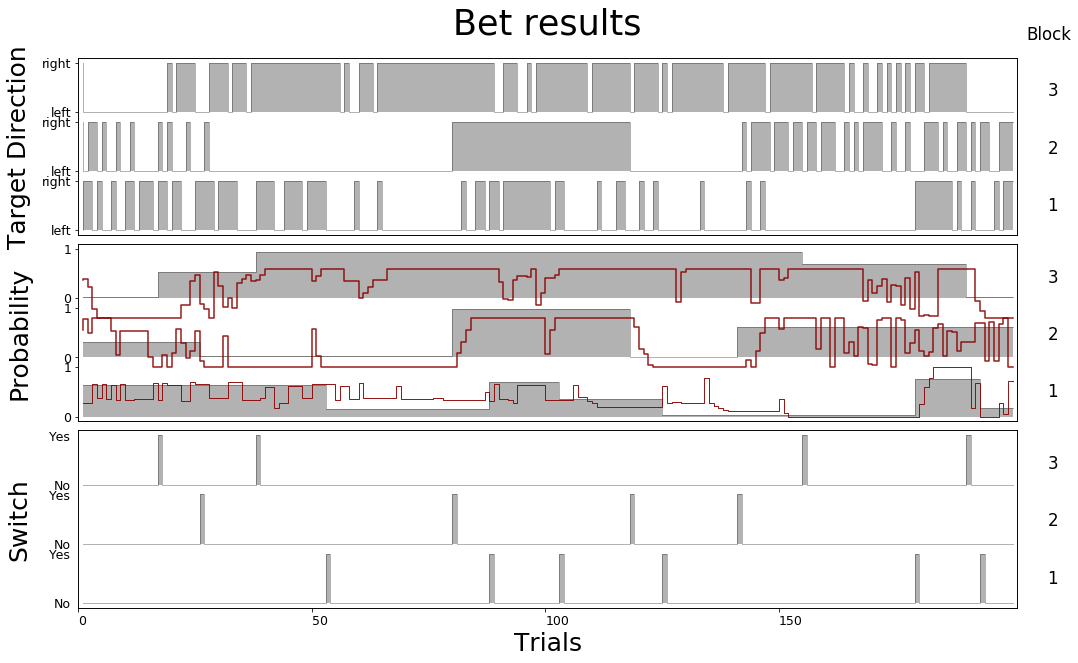

In [5]:
fig, axs, p = e.plot_experiment(fig_width=fig_width, t_titre=t_titre, t_label=t_label, mode='pari')

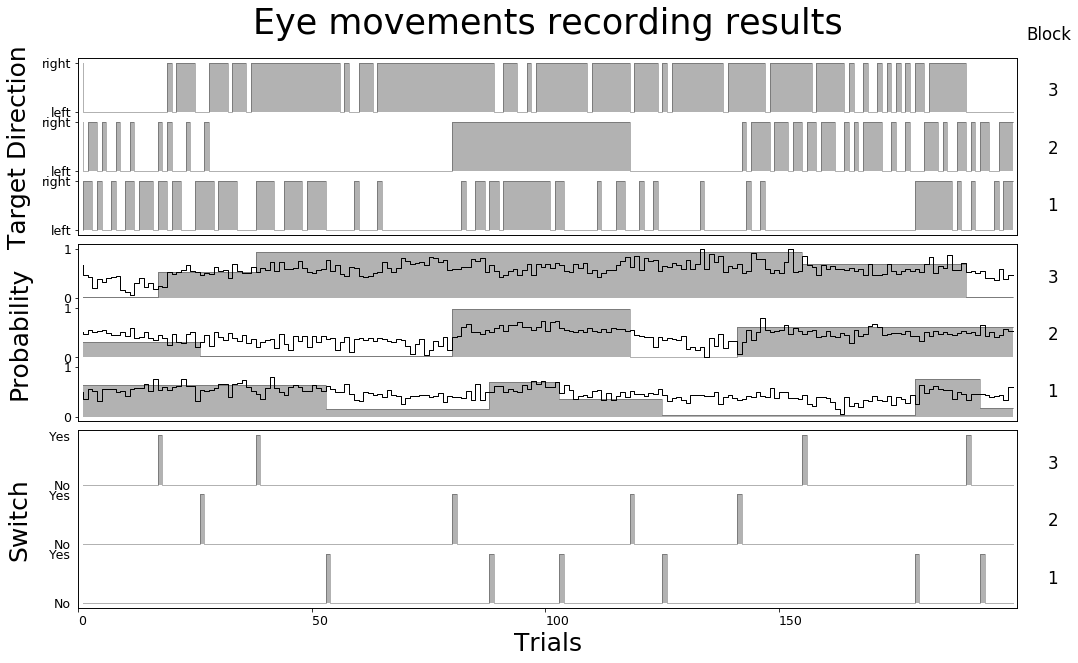

In [6]:
fig, axs, p = e.plot_experiment(fig_width=fig_width, t_titre=t_titre, t_label=t_label, mode='enregistrement')

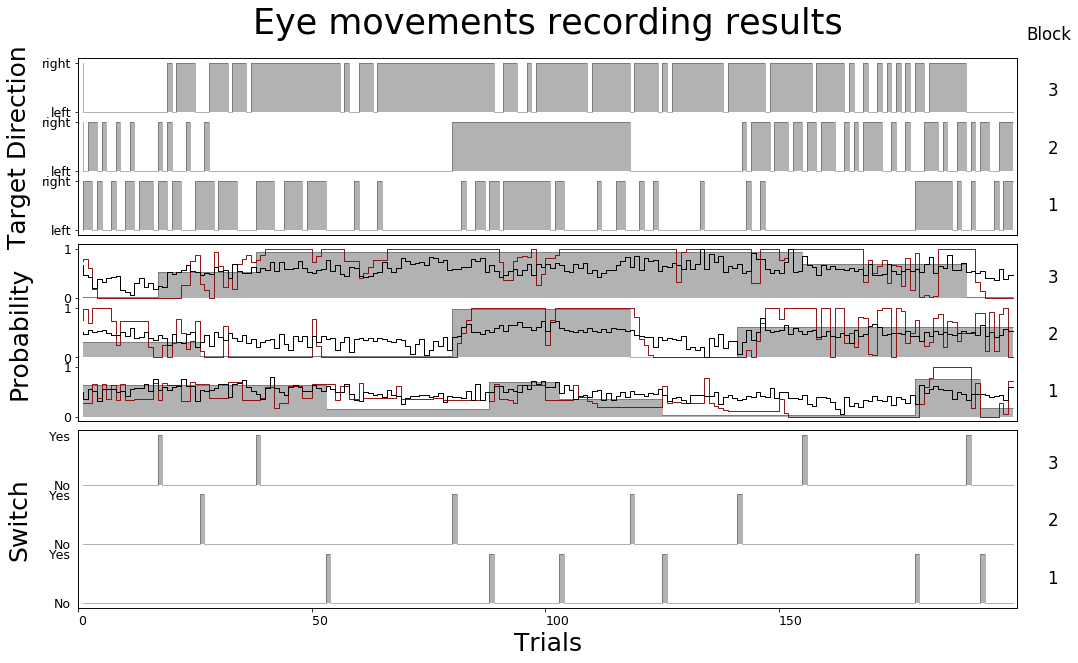

In [7]:
fig, axs, p = e.plot_experiment(fig_width=fig_width, t_titre=t_titre, t_label=t_label, mode='deux')

sujet 0 = TN
sujet 6 = CS
sujet 10 = IP
sujet 5 = LB


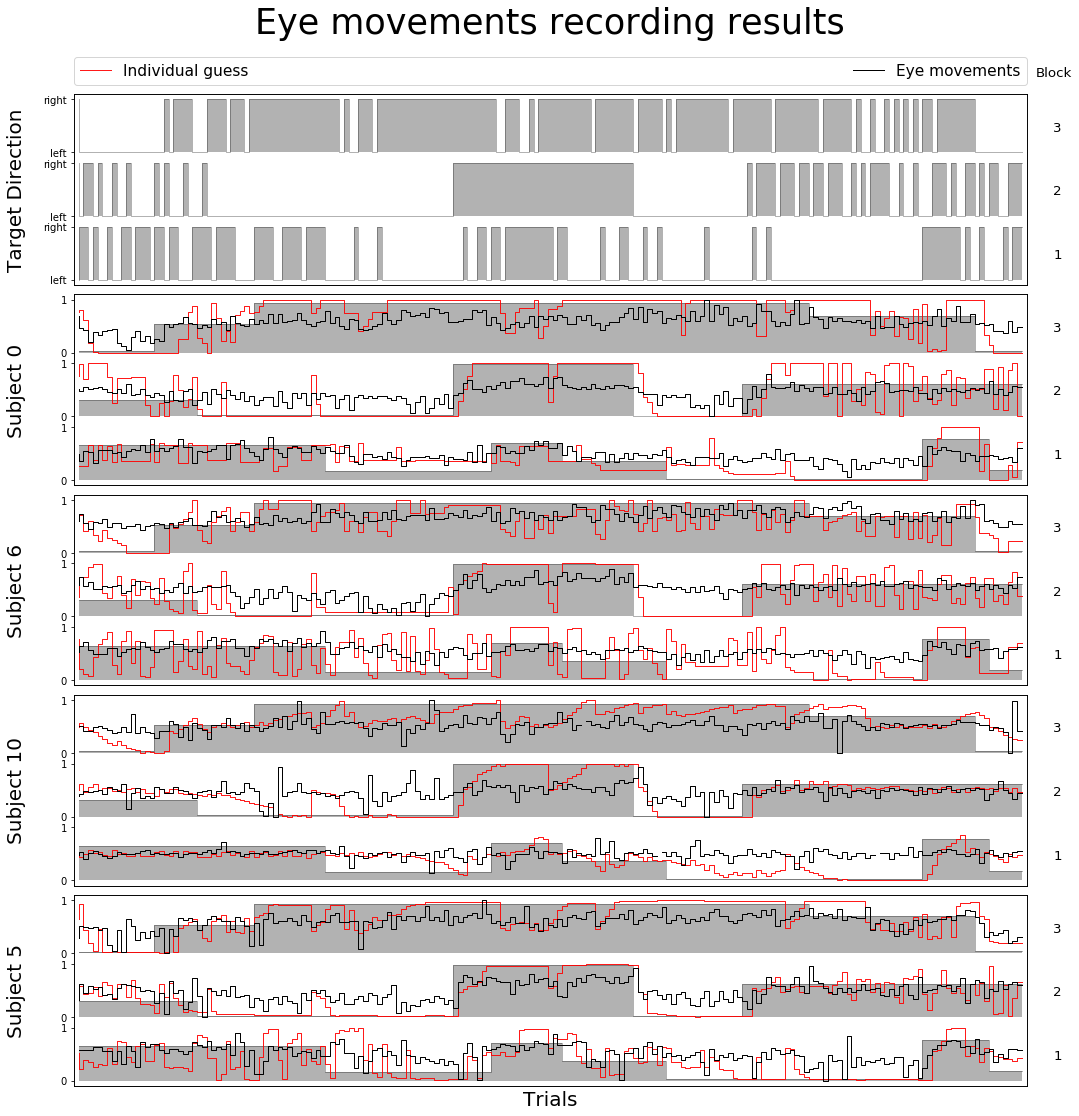

In [8]:
sujet = [0,6,10, 5]
fig, axs= e.plot_experiment_plus(sujet=sujet)